In [2]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

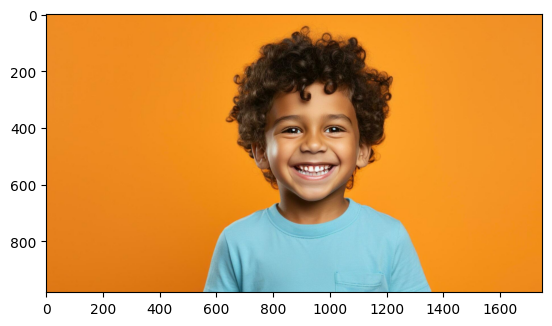

In [3]:
img = cv2.imread('happy.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
predictions = DeepFace.analyze(img, actions=['emotion'])
predictions

[{'emotion': {'angry': 5.807886809405107e-20,
   'disgust': 5.844793011158578e-31,
   'fear': 3.9649743478960814e-19,
   'happy': 100.0,
   'sad': 3.678849378382638e-15,
   'surprise': 6.7077562212088195e-18,
   'neutral': 1.020430628884128e-07},
  'dominant_emotion': 'happy',
  'region': {'x': 738,
   'y': 244,
   'w': 402,
   'h': 402,
   'left_eye': (1009, 408),
   'right_eye': (869, 411)},
  'face_confidence': 0.93}]

In [5]:
pred_result = predictions[0]['dominant_emotion']
pred_result

'happy'

In [6]:
import cv2.data


faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

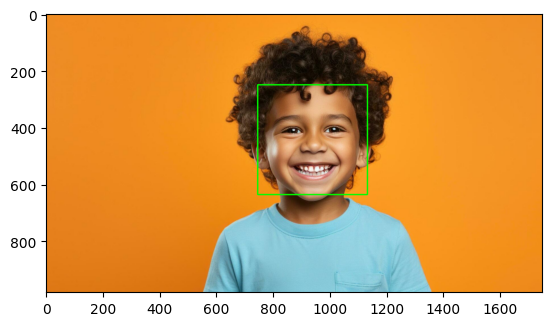

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for(x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 4)
    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

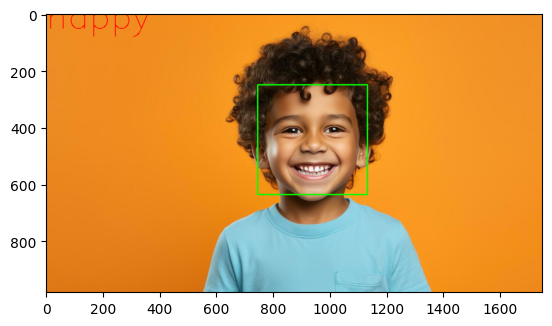

In [8]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, predictions[0]['dominant_emotion'], (0,50), font, 4, (0, 0, 255), 2, cv2.LINE_4)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## real time detection

In [11]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open camera")

while True:
    ret, frame = cap.read()

    result = DeepFace.analyze(frame, actions= ['emotion'], enforce_detection=False)

    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, result[0]['dominant_emotion'], (50,50), font, 2, (0, 0, 255), 2, cv2.LINE_4)

    cv2.imshow("Demo Video", frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

